# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [49]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
# No optinal changes were made.

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [50]:
number_of_years = df.groupby('YEAR')['AVG_MATH_8_SCORE'].nunique().count() # 33 years

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [51]:
state1 = "MICHIGAN"
state2 = "OHIO"
michigan_versus_ohio = df[df['STATE'].isin([state1, state2])]
mean_michigan = michigan_versus_ohio[michigan_versus_ohio['STATE'] == "MICHIGAN"]['AVG_MATH_8_SCORE'].mean()
mean_ohio = michigan_versus_ohio[michigan_versus_ohio['STATE'] == "OHIO"]['AVG_MATH_8_SCORE'].mean()
if mean_ohio > mean_michigan:
    print("\nOHIO has a higher mean.")
elif mean_michigan < mean_ohio:
    print("\nMICHIGAN has a higher mean.")
else:
    print("\nBoth states have the same mean.")


OHIO has a higher mean.


Find the average for your chosen test across all states in 2019

In [52]:
avg_grade_8_math_per_state = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()

For each state, find a maximum value for your chosen test score

In [53]:
avg_grade_8_math_per_state = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [84]:
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']

Feature engineering justification: **The average amount of instruction expenditure per student may have an impact on their grades.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

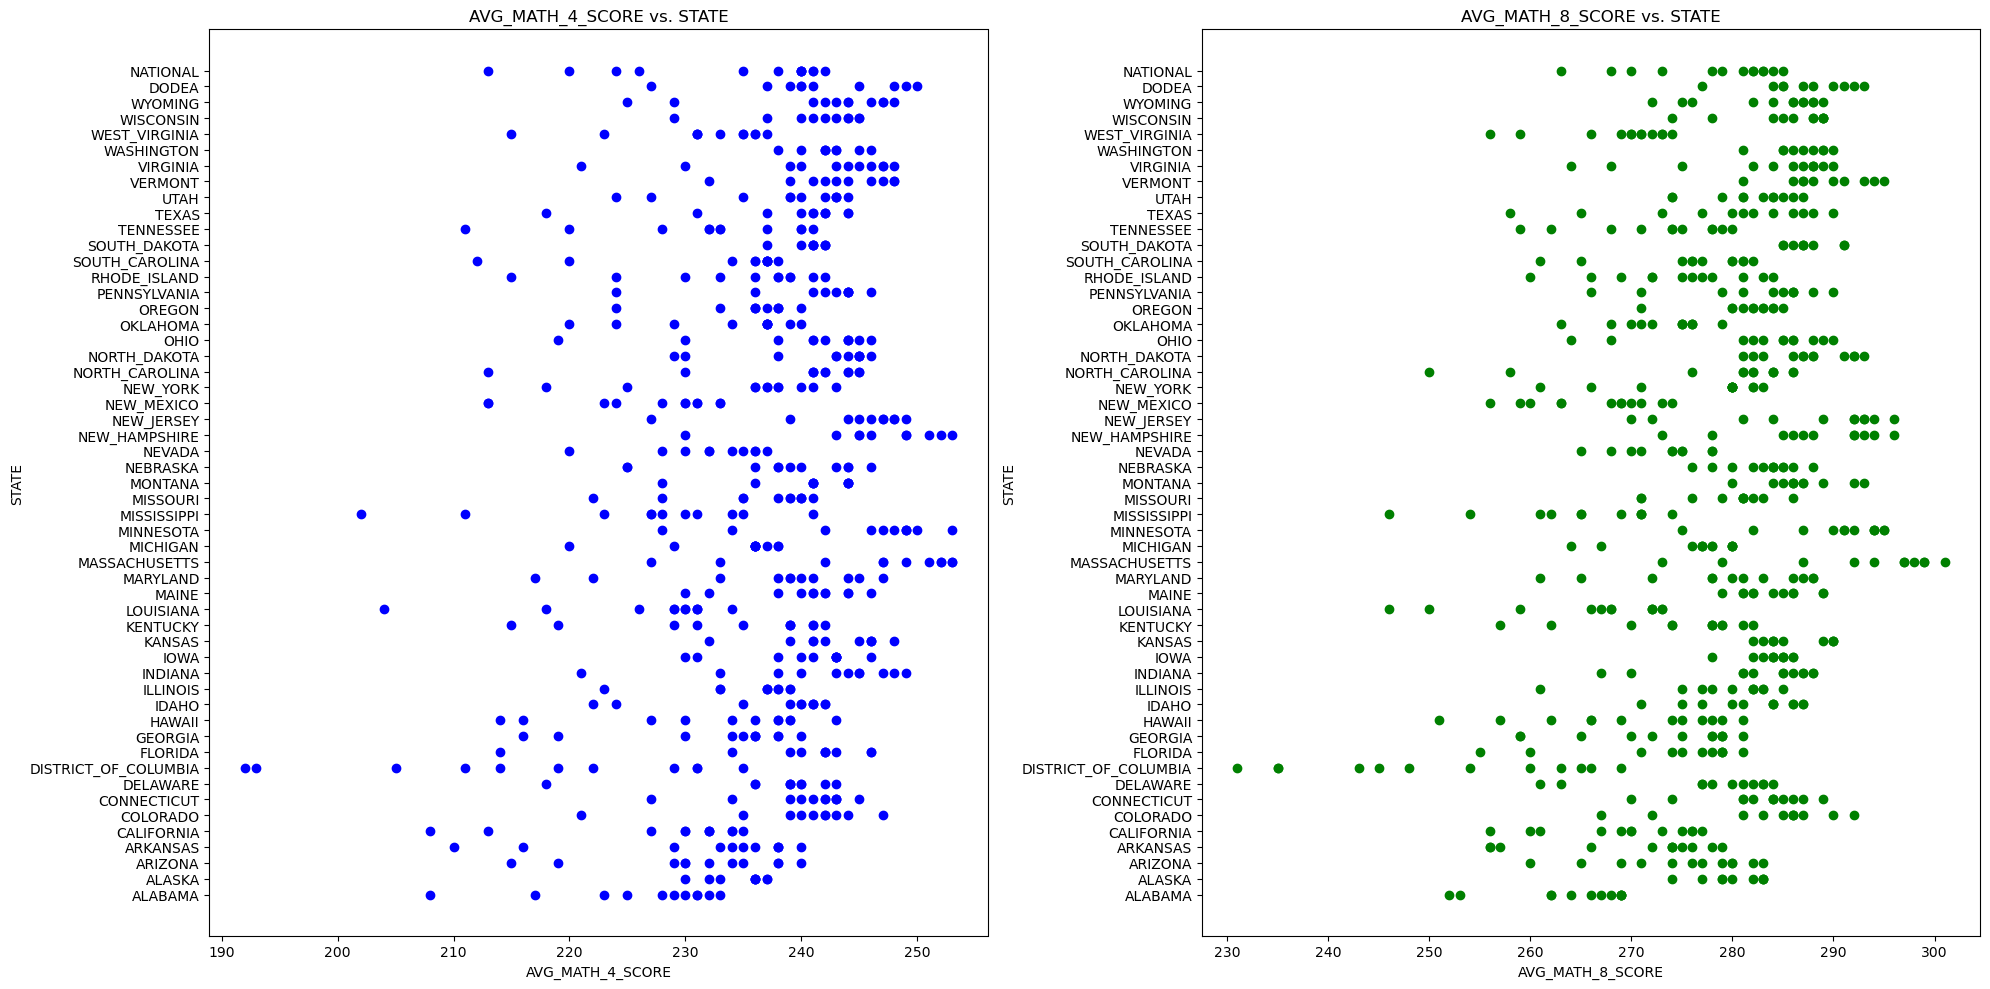

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(df['AVG_MATH_4_SCORE'], df['STATE'], color='blue')
plt.title('AVG_MATH_4_SCORE vs. STATE')
plt.xlabel('AVG_MATH_4_SCORE')
plt.ylabel('STATE')

plt.subplot(1, 2, 2)
plt.scatter(df['AVG_MATH_8_SCORE'], df['STATE'], color='green')
plt.title('AVG_MATH_8_SCORE vs. STATE')
plt.xlabel('AVG_MATH_8_SCORE')
plt.ylabel('STATE')

plt.tight_layout()
plt.show()


**Two scatter plots, one showing the average math scores for fourth-grade students and another for eight-grade math across various states in the United States from 2003 to 2015**

**Visualization 2**

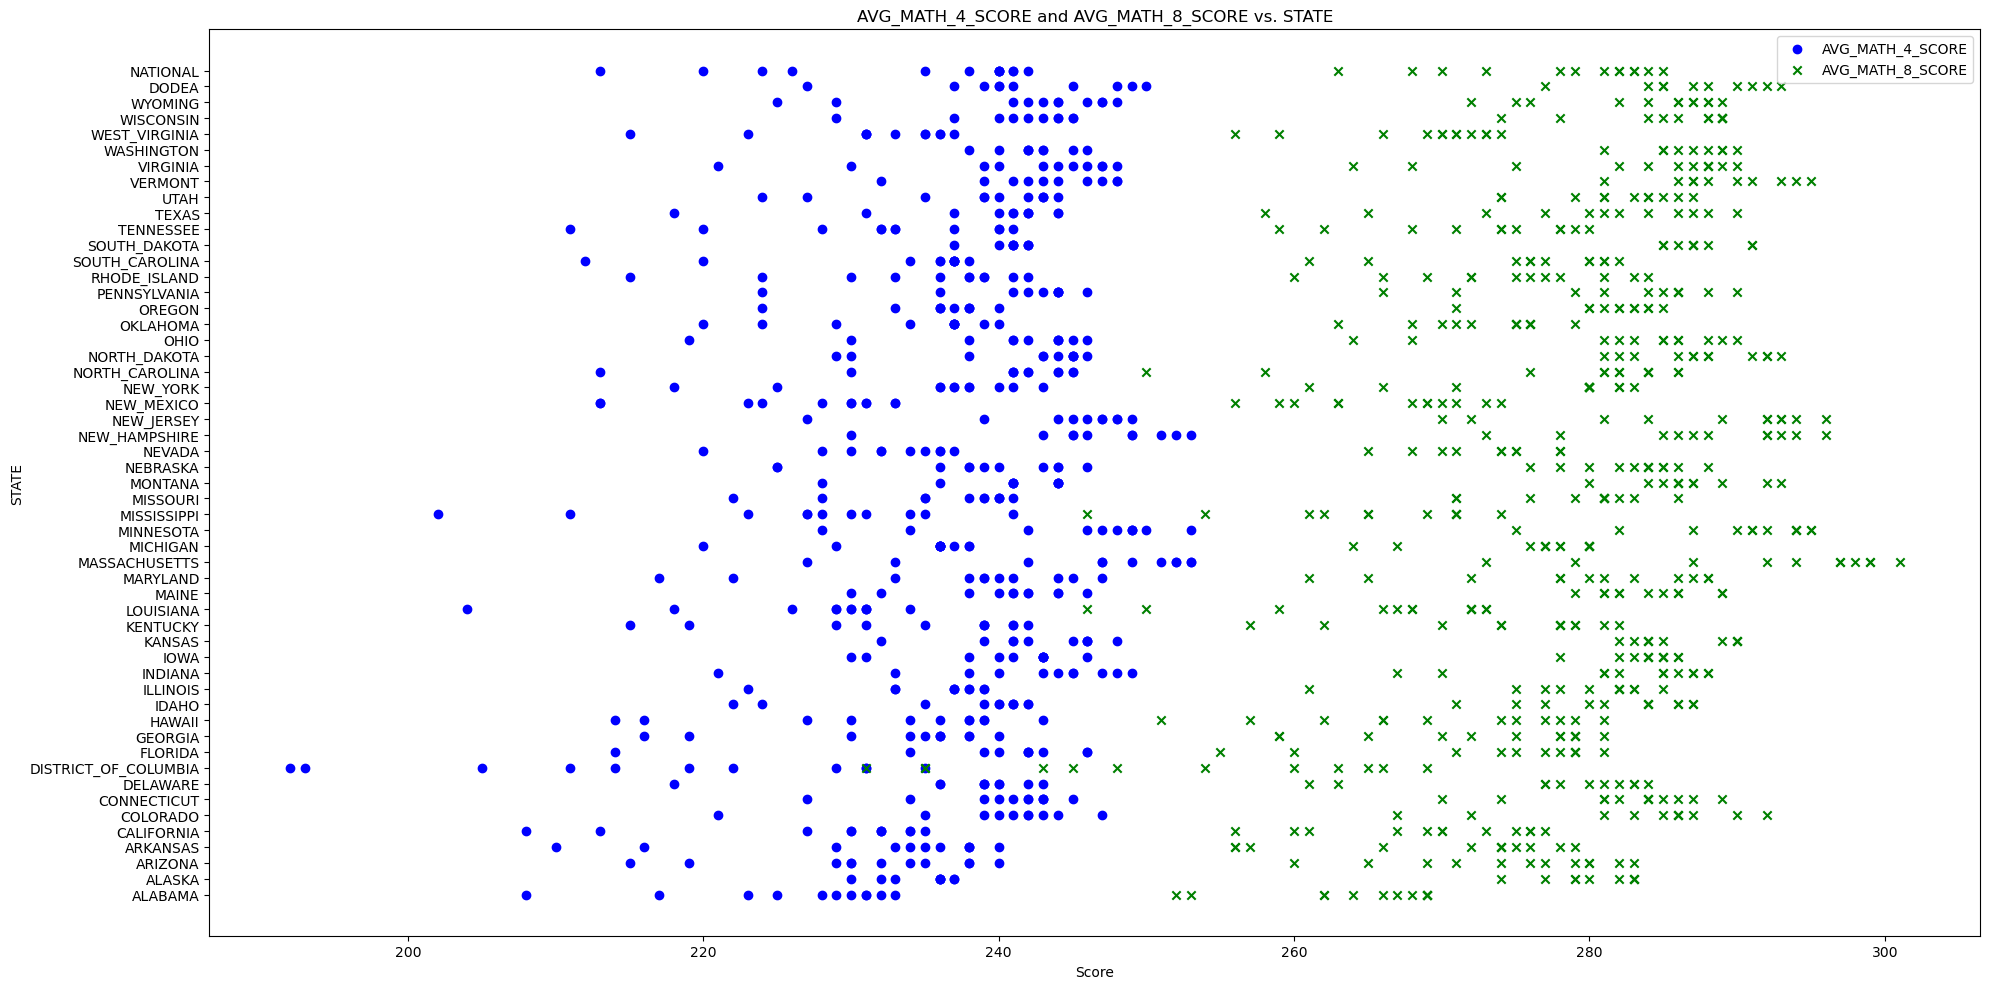

In [55]:
plt.figure(figsize=(20, 10))

# Scatter plot for AVG_MATH_4_SCORE
plt.scatter(df['AVG_MATH_4_SCORE'], df['STATE'], color='blue', label='AVG_MATH_4_SCORE')

# Scatter plot for AVG_MATH_8_SCORE
plt.scatter(df['AVG_MATH_8_SCORE'], df['STATE'], color='green', marker='x', label='AVG_MATH_8_SCORE')

plt.title('AVG_MATH_4_SCORE and AVG_MATH_8_SCORE vs. STATE')
plt.xlabel('Score')
plt.ylabel('STATE')
plt.legend()
plt.tight_layout()
plt.show()

**The scatter plot shows a positive correlation between average fourth grade math and eighth grade math scores by state, indicating that states with higher average fourth grade math scores also tend to have higher average eighth grade math scores. The use of blue squares and green crosses helps differentiate between two sets of data, but both sets follow the same upward trend.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [56]:
from sklearn.model_selection import train_test_split

In [60]:
X = df[['ENROLL','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [61]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [88]:
# Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, 
# without considering their direction.

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_pred)

# Root Mean Squared Error (RMSE): The square root of the mean squared error, 
# providing an error metric in the same units as the target variable.
rmse = mean_squared_error(y_train, y_pred, squared=False)


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

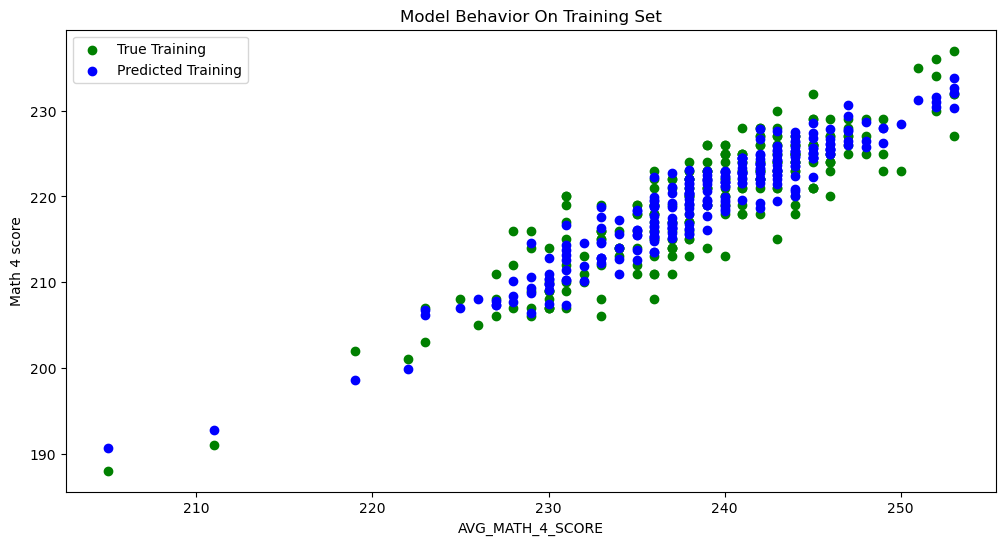

In [66]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "green")
plt.scatter(X_train[col_name], model.predict(X_train), color = "blue")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

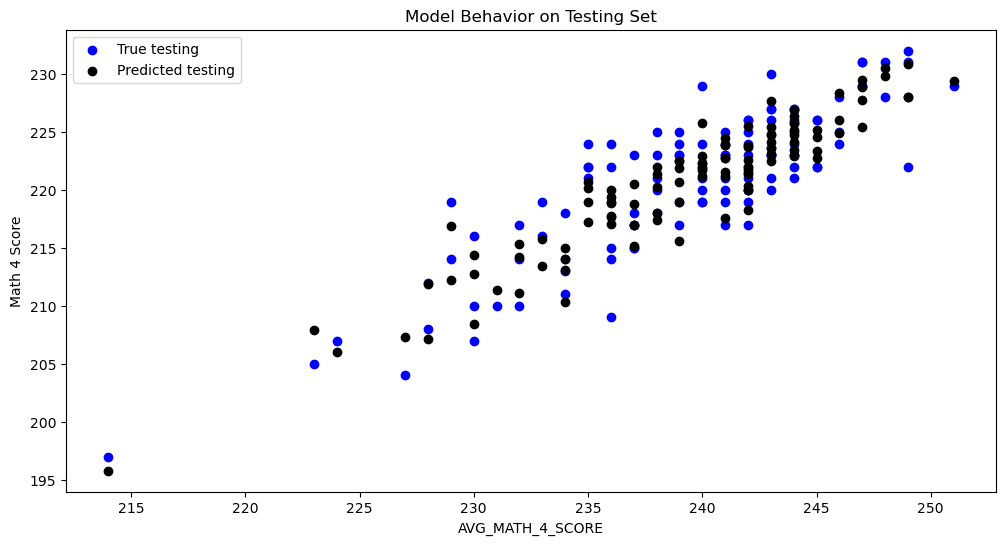

In [82]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")